In [1]:
include("/Users/ksb/Catlab.jl/test/atp/ATP.jl");
using Catlab.CategoricalAlgebra

using Catlab.Graphics
function show_diagram(d::WiringDiagram)
  to_graphviz(d, orientation=LeftToRight, labels=false)
end


show_diagram (generic function with 1 method)

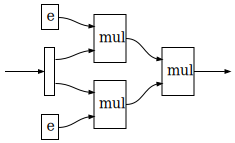

In [2]:
show_diagram(idxxid)

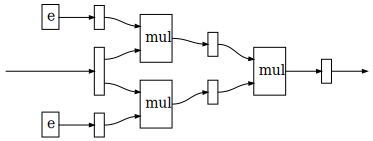

In [3]:
# "Pad" by inserting empty nodes between generators and the outer ports
show_diagram(wd_pad(idxxid))

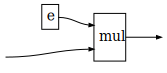

In [4]:
# Rewrite rule left 
show_diagram(leftid[1])

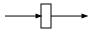

In [5]:
# Rewrite rule right 
show_diagram(leftid[2])

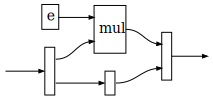

In [6]:
# merged rewrite rule (replace either left pattern or right pattern with this via DPO)
merge_leftid = branch2(leftid...)
show_diagram(merge_leftid)

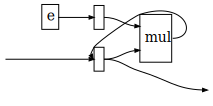

In [7]:
# as a hypergraph (connected frobenius nodes get condensed to single vertex)
# because we don't have fancy hypergraph visualization, we convert back to WD
csp_wd = cospan_to_wd(wd_to_cospan(merge_leftid,Σ)[2])
show_diagram(csp_wd)

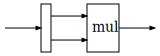

In [8]:
# We know that (e*x)*(x*e) is equal to x*x 
show_diagram(xx)

In [13]:
# However, we cannot directly 'prove' this via a homomorphism of structured cospans
xx_sc = wd_to_cospan(xx,Σ)[2]
idxxid_sc = wd_to_cospan(idxxid,Σ)[2]
@assert !is_homomorphic(xx_sc, idxxid_sc)


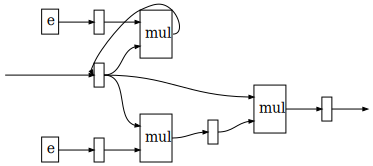

In [10]:
# Let's apply leftid rewrite rule
rw1 = apply_eq(idxxid_sc, Σ, leftid);
show_diagram(cospan_to_wd(rw1))

# the input goes directly to one arg of the final mul


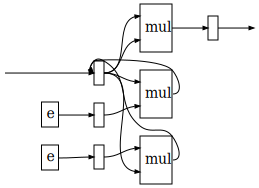

In [11]:
# now apply rightid 
rw2 = apply_eq(rw1, Σ, rightid);
show_diagram(cospan_to_wd(rw2))


In [14]:
# there was no homomorphism after one rewrite, but there is one after both 
@assert !is_homomorphic(xx_sc, rw1)
@assert is_homomorphic(xx_sc, rw2)